In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('APBD_2021.xlsx')

In [3]:
df.head()

Unnamed: 0 Akun Analisis         Namakegiatan    Namakegiatan_stem  \
0           0       41. PAD           pendapatan                dapat   
1           1       41. PAD           pendapatan                dapat   
2           2       41. PAD           pendapatan                dapat   
3           3       41. PAD           pendapatan                dapat   
4           4       41. PAD  non kegiatannon sub  non kegiatannon sub   

   Kodepemda     standarpemda  Tahun  Nilaianggaran  
0       1.00    Provinsi Aceh   2021   1.374556e+12  
1       1.00    Provinsi Aceh   2021   1.213355e+10  
2       1.00    Provinsi Aceh   2021   1.823856e+11  
3       1.00    Provinsi Aceh   2021   8.326078e+11  
4       1.01  Kab. Aceh Barat   2021   2.393480e+10

In [4]:
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].astype(str)
from nltk.tokenize import word_tokenize 
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].apply(word_tokenize)
df.head()

Unnamed: 0 Akun Analisis         Namakegiatan        Namakegiatan_stem  \
0           0       41. PAD           pendapatan                  [dapat]   
1           1       41. PAD           pendapatan                  [dapat]   
2           2       41. PAD           pendapatan                  [dapat]   
3           3       41. PAD           pendapatan                  [dapat]   
4           4       41. PAD  non kegiatannon sub  [non, kegiatannon, sub]   

   Kodepemda     standarpemda  Tahun  Nilaianggaran  
0       1.00    Provinsi Aceh   2021   1.374556e+12  
1       1.00    Provinsi Aceh   2021   1.213355e+10  
2       1.00    Provinsi Aceh   2021   1.823856e+11  
3       1.00    Provinsi Aceh   2021   8.326078e+11  
4       1.01  Kab. Aceh Barat   2021   2.393480e+10

In [5]:
buang = ['tingkat', 'layan', 'ada', 'bina', 'rencana', 'selenggara', 'kembang', 'susun', 'bangun', 'sedia', 'jasa', 'bantu', 'pelihara', 'rutin', 'kelola',
         'laksana', 'evaluasi', 'monitoring', 'operasional', 'lapor', 'kantor', 'kerja', 'fasilitas', 'perintah', 'alat', 'drpd', 'rancang', 'atur', 'bimbing',
         'teknis', 'rkpd', 'tulis', 'tenaga', 'milik', 'daerah', 'dinas', 'rehabilitasi', 'berat', 'sistem', 'informasi', 'komunikasi', 'makan', 'minum', 'sumber',
         'daya', 'non' ,'instalasi', 'listrik', 'fisik', 'terang', 'langsung', 'ganda', 'barang', 'cetak', 'kendala', 'kala', 'masyarakat', 'rapat', 'sosialisasi',
         'konsultasi', 'informasi', 'tata', 'lingkung', 'pimpin', 'anggota', 'hasil', 'temu', 'awas', 'internal', 'tindak', 'arsip', 'administrasi', 'koordinasi',
         'dapat', 'lengkap', 'kualitas', 'data', 'surat', 'manfaat', 'rapat', 'rapatrapat', 'pustaka', 'dprd', 'gedung', 'batas', 'wilayah', 'komponen', 'kelompok',
         'skpd', 'jabat', 'rumah', 'verifikasi', 'intensifikasi', 'ekstentifikasi', 'belanja', 'kendara', 'motor', 'tambah', 'lurah', 'daerah', 'angkut', 'jalan',
         'terima', 'biaya', 'kendali', 'desa', 'kota', 'bidang', 'hidup', 'camat', 'kabupaten', 'uang', 'paripurna', 'uji', 'bijak', 'pemuda', 'tetap', 'pusat',
         'sinkronisasi', 'bahan', 'baca', 'perundangundangan', 'naik', 'pangkat', 'ekstensifikasi', 'duduk', 'dukung', 'disiplin', 'operasi', 'latih', 'bahaya', 'bekal',
         'khusus', 'harihari', 'hari', 'reformasi', 'birokrasi', 'potensi', 'kabupatenkota', 'hukumfasilitasi', 'rekomendasi', 'kotapembangunan', 'kotakoordinasi']

# Pada Nama Kegiatan
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].apply(lambda x: [i for i in x if i not in buang])

In [6]:
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].astype(str)
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

df["Namakegiatan_stem"] = df["Namakegiatan_stem"].apply(join_text_list)

In [7]:
import multiprocessing
from gensim.models import Word2Vec

In [8]:
cores = multiprocessing.cpu_count()

In [9]:
w2v_model = Word2Vec(min_count=10,
                     window=2,
                     vector_size=15,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     workers=cores-1)

In [10]:
import numpy as np
def vectorize(list_of_docs, model):
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [11]:
df['Namakegiatan_stem'] = df['Namakegiatan_stem'].astype(str)

In [12]:
w2v_model.build_vocab(df['Namakegiatan_stem'], progress_per=10000)
w2v_model.train(df['Namakegiatan_stem'], total_examples=w2v_model.corpus_count, epochs=50, report_delay=1)
w2v_model.init_sims(replace=True)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_10556/991895892.py:3: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [13]:
vectorized_docs = vectorize(df['Namakegiatan_stem'], model=w2v_model)

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
true_k = 50
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=10)
model.fit(vectorized_docs)
labels=model.labels_
results=pd.DataFrame(list(zip(df['Akun Analisis'],
                              df['Namakegiatan'],
                              df['Namakegiatan_stem'],
                              df['Kodepemda'],
                              df['standarpemda'],
                              df['Tahun'],
                              df['Nilaianggaran'],
                              labels)),columns=['Akun Analisis','Nama Kegiatan','Nama Kegiatan_stem',
                                                'Kode Pemda', 'Standar Pemda', 'Tahun', 'Nilai Anggaran', 'Cluster'])
print(results.sort_values(by=['Cluster']))

                  Akun Analisis  \
353629        53. Belanja Modal   
230291  52. Belanja Barang Jasa   
230292  52. Belanja Barang Jasa   
347771        53. Belanja Modal   
28123       51. Belanja Pegawai   
...                         ...   
332627        53. Belanja Modal   
123419  52. Belanja Barang Jasa   
167307  52. Belanja Barang Jasa   
332639        53. Belanja Modal   
307755        53. Belanja Modal   

                                            Nama Kegiatan  \
353629  penyediaan pelayanan kesehatan ukm ukp kewenan...   
230291  perencanaan penganggaran evaluasi kinerja pera...   
230292  perencanaan penganggaran evaluasi kinerja pera...   
347771                     rehabilitasi berat ruang kelas   
28123   pencegahan pengendalian pemadaman penyelamatan...   
...                                                   ...   
332627  pengelolaan dana bos sekolah dasar sdn karangk...   
123419  pengembangan kompetensi asn koordinasi kerjasa...   
167307  penyelenggaraan promos

In [16]:
# from sklearn.metrics import silhouette_score
# score = silhouette_score(vectorized_docs, model.labels_, metric='euclidean')
# print('Silhouetter Score: %.3f' % score)

In [17]:
results.head()

Akun Analisis        Nama Kegiatan Nama Kegiatan_stem  Kode Pemda  \
0       41. PAD           pendapatan                           1.00   
1       41. PAD           pendapatan                           1.00   
2       41. PAD           pendapatan                           1.00   
3       41. PAD           pendapatan                           1.00   
4       41. PAD  non kegiatannon sub    kegiatannon sub        1.01   

     Standar Pemda  Tahun  Nilai Anggaran  Cluster  
0    Provinsi Aceh   2021    1.374556e+12        1  
1    Provinsi Aceh   2021    1.213355e+10        1  
2    Provinsi Aceh   2021    1.823856e+11        1  
3    Provinsi Aceh   2021    8.326078e+11        1  
4  Kab. Aceh Barat   2021    2.393480e+10       35

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 14400x5040 with 0 Axes>

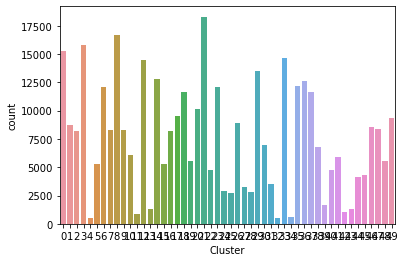

<Figure size 14400x5040 with 0 Axes>

In [18]:
import seaborn as sns
sns.countplot('Cluster', data = results)
plt.figure(figsize=(200,70)) 

In [19]:
results.loc[results['Nama Kegiatan_stem'] == '']

Akun Analisis Nama Kegiatan Nama Kegiatan_stem  \
0                                  41. PAD    pendapatan                      
1                                  41. PAD    pendapatan                      
2                                  41. PAD    pendapatan                      
3                                  41. PAD    pendapatan                      
8                                  41. PAD    pendapatan                      
...                                    ...           ...                ...   
378587  66. Pengeluaran Pembiayaan Lainnya           non                      
378588  66. Pengeluaran Pembiayaan Lainnya           non                      
378590  66. Pengeluaran Pembiayaan Lainnya           non                      
378592  66. Pengeluaran Pembiayaan Lainnya           non                      
378605  66. Pengeluaran Pembiayaan Lainnya           non                      

        Kode Pemda              Standar Pemda  Tahun  Nilai Anggaran  Cluster  
0             1.00              Provinsi Aceh   2021    1.374556e+12        1  
1             1.00              Provinsi Aceh   2021    1.213355e+10        1  
2             1.00              Provinsi Aceh   2021    1.823856e+11        1  
3             1.00              Provinsi Aceh   2021    8.326078e+11        1  
8             1.02            Kab. Aceh Besar   2021    9.493100e+10        1  
...            ...                        ...    ...             ...      ...  
378587       13.12                Kab. Madiun   2021    1.000000e+10        1  
378588       13.13               Kab. Magetan   2021    2.500000e+09        1  
378590       13.22           Kab. Probolinggo   2021    1.500000e+10        1  
378592       13.26               Kab. Sumenep   2021    2.500000e+10        1  
378605       20.11  Kab. Pangkajene Kepulauan   2021    5.000000e+10        1  

[8764 rows x 8 columns]

In [20]:
results['Nama Kegiatan_stem'] = results['Nama Kegiatan_stem'].replace([''], 'kosong')

In [21]:
results.loc[results['Cluster'] == 5][:60]

Akun Analisis                                      Nama Kegiatan  \
5764  51. Belanja Pegawai          pembuatan peta potensi investasi provinsi   
5790  51. Belanja Pegawai                     pengawasan peredaran pertanian   
5823  51. Belanja Pegawai  pengendalian pelaksanaan penanaman modal kewen...   
5832  51. Belanja Pegawai  penyadaran pemberdayaan pengembangan pemuda ke...   
5913  51. Belanja Pegawai  pelaksanaan kebijakan perekonomianpengendalian...   
6011  51. Belanja Pegawai  penyelenggaraan pengawasan internalreviu lapor...   
6111  51. Belanja Pegawai  pelaksanaan kebijakan perekonomianpengendalian...   
6248  51. Belanja Pegawai  koordinasi pemberdayaan desapeningkatan efekti...   
6336  51. Belanja Pegawai  pelaksanaan kebijakan perekonomianpengendalian...   
6395  51. Belanja Pegawai  pengembangan inovasi teknologipenelitian penge...   
6401  51. Belanja Pegawai  pengendalian evaluasi pelaporan bidang perenca...   
6453  51. Belanja Pegawai  pelaksanaan kebijakan perekonomianpengendalian...   
6498  51. Belanja Pegawai  pengelolaan barang milik daerahinventarisasi b...   
6516  51. Belanja Pegawai  pengembangan inovasi teknologipenelitian penge...   
6607  51. Belanja Pegawai  pelaksanaan kebijakan perekonomianpengendalian...   
6687  51. Belanja Pegawai  pengembangan kompetensi asnpengeloaan administ...   
6693  51. Belanja Pegawai  pengendalian evaluasi pelaporan bidang perenca...   
6839  51. Belanja Pegawai  koordinasi pemberdayaan desapeningkatan efekti...   
6863  51. Belanja Pegawai  pelaksanaan kebijakan perekonomianpengendalian...   
6956  51. Belanja Pegawai  pendampingan asistensipendampingan asistensi v...   
6977  51. Belanja Pegawai  pengelolaan barang milik daerahinventarisasi b...   
7056  51. Belanja Pegawai  pengembangan kompetensi asnpengeloaan administ...   
7066  51. Belanja Pegawai  pengendalian evaluasi pelaporan bidang perenca...   
7133  51. Belanja Pegawai  penyelenggaraan pengawasan internalreviu lapor...   
7134  51. Belanja Pegawai  penyelenggaraan pengawasan internalreviu lapor...   
7208  51. Belanja Pegawai  pengembangan pertaniankoordinasi sinkronisasi ...   
7280  51. Belanja Pegawai  pelaksanaan kebijakan perekonomianpengendalian...   
7328  51. Belanja Pegawai  pelaksanaan konservasi energi wilayah provinsi...   
7329  51. Belanja Pegawai  pelaksanaan konservasi energi wilayah provinsi...   
7348  51. Belanja Pegawai  pemberdayaan pengembangan organisasi kepemudaa...   
7371  51. Belanja Pegawai  penetapan penyelenggaraan bangunan gedung kepe...   
7391  51. Belanja Pegawai  pengelolaan destinasi pariwisata provinsipenge...   
7400  51. Belanja Pegawai  pengelolaan perpustakaan daerah provinsipembin...   
7421  51. Belanja Pegawai  penyelenggaraan jalan provinsisurvei kondisi j...   
7427  51. Belanja Pegawai  penyusunan perencanaan pendanaankoordinasi pen...   
7480  51. Belanja Pegawai  pelaksanaan kebijakan perekonomianpengendalian...   
7791  51. Belanja Pegawai  pengembangan inovasi teknologipenelitian penge...   
7793  51. Belanja Pegawai  pengendalian evaluasi pelaporan bidang perenca...   
7873  51. Belanja Pegawai  pelaksanaan kebijakan perekonomianpengendalian...   
7892  51. Belanja Pegawai  pengembangan kompetensi asnpengeloaan administ...   
7940  51. Belanja Pegawai  pengelolaan destinasi pariwisata kabupaten kot...   
8249  51. Belanja Pegawai  fasilitasi rekomendasi koordinasi pembinaan pe...   
8250  51. Belanja Pegawai  fasilitasi rekomendasi koordinasi pembinaan pe...   
8267  51. Belanja Pegawai  koordinasi pemberdayaan desapeningkatan efekti...   
8420  51. Belanja Pegawai  pengembangan inovasi teknologipenelitian penge...   
8424  51. Belanja Pegawai  pengembangan pertaniankoordinasi sinkronisasi ...   
8431  51. Belanja Pegawai  pengendalian evaluasi pelaporan bidang perenca...   
8686  51. Belanja Pegawai  pengembangan inovasi teknologipenelitian penge...   
8711  51. Belanja Pegawai  koordinasi penyelenggaraan pemerintahan kecama...   
8734  51. Be

In [39]:
results.loc[result['Nama Kegiatan_stem'].str.contains('sehat')]

Akun Analisis  \
1167                41. PAD   
1168                41. PAD   
1581                41. PAD   
5779    51. Belanja Pegawai   
5818    51. Belanja Pegawai   
...                     ...   
377477  54. Belanja Lainnya   
377514  54. Belanja Lainnya   
377521  54. Belanja Lainnya   
377522  54. Belanja Lainnya   
377523  54. Belanja Lainnya   

                                            Nama Kegiatan  \
1167                           pendapatan dinas kesehatan   
1168                           pendapatan dinas kesehatan   
1581    pengembangan pelaksanaan upaya kesehatan bersu...   
5779    penerbitan izin rumah sakit kelas b pelayanan ...   
5818    pengembangan mutu peningkatan kompetensi tekni...   
...                                                   ...   
377477  penyediaan layanan kesehatan ukm ukp rujukan d...   
377514  pengelolaan pendidikan sekolah menengah pertam...   
377521  penyediaan pelayanan kesehatan ukm ukp kewenan...   
377522  penyediaan layanan kesehatan ukm ukp rujukan d...   
377523  penyediaan layanan kesehatan ukm ukp rujukan d...   

                                       Nama Kegiatan_stem  Kode Pemda  \
1167                                                sehat       13.37   
1168                                                sehat       13.37   
1581                                     upaya sehat ukbm       20.16   
5779             terbit izin sakit kelas b sehat provinsi        1.00   
5818               mutu kompetensi manusia sehat provinsi        1.00   
...                                                   ...         ...   
377477  sehat ukm ukp rujuk kabupatenkotaoperasional s...       34.03   
377514  didik sekolah tengah pertamarehabilitasi sedan...       34.04   
377521  sehat ukm ukp wenang kabupatenkotapengadaan sehat       34.04   
377522  sehat ukm ukp rujuk kabupatenkotaoperasional s...       34.04   
377523  sehat ukm ukp rujuk kabupatenkotapengelolaan j...       34.04   

                 Standar Pemda  Tahun  Nilai Anggaran  Cluster  Label  
1167             Kota Surabaya   2021    7.857883e+09       29     29  
1168             Kota Surabaya   2021    1.084238e+11       29     29  
1581    Kab. Kepulauan Selayar   2021    2.580892e+10       40     40  
5779             Provinsi Aceh   2021    5.592000e+07       25     25  
5818             Provinsi Aceh   2021    2.364000e+07       33     33  
...                        ...    ...             ...      ...    ...  
377477            Kab. Nunukan   2021    5.000000e+08       26     26  
377514            Kota Tarakan   2021    4.417400e+07        3      3  
377521            Kota Tarakan   2021    5.000000e+07        0      0  
377522            Kota Tarakan   2021    2.500000e+08       26     26  
377523            Kota Tarakan   2021    5.000000e+08       18     18  

[29312 rows x 9 columns]

In [38]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378611 entries, 0 to 378610
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Akun Analisis       378611 non-null  object 
 1   Nama Kegiatan       377749 non-null  object 
 2   Nama Kegiatan_stem  378611 non-null  object 
 3   Kode Pemda          378611 non-null  float64
 4   Standar Pemda       378611 non-null  object 
 5   Tahun               378611 non-null  int64  
 6   Nilai Anggaran      378611 non-null  float64
 7   Cluster             378611 non-null  int32  
 8   Label               378611 non-null  int32  
dtypes: float64(2), int32(2), int64(1), object(4)
memory usage: 23.1+ MB


Cluster: 0


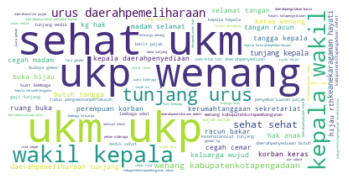

Cluster: 1


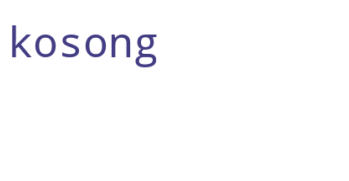

Cluster: 2


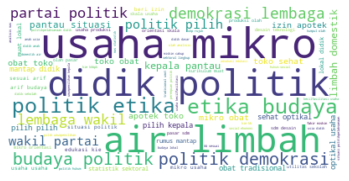

Cluster: 3


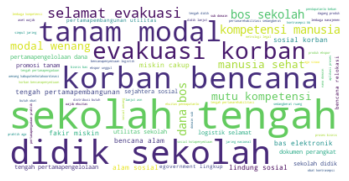

Cluster: 4


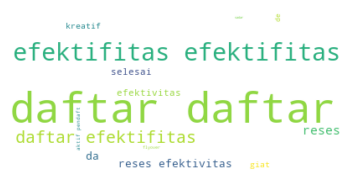

Cluster: 5


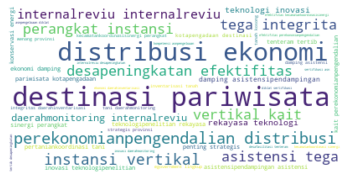

Cluster: 6


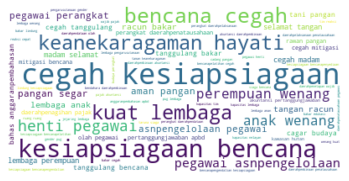

Cluster: 7


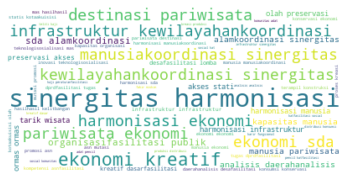

Cluster: 8


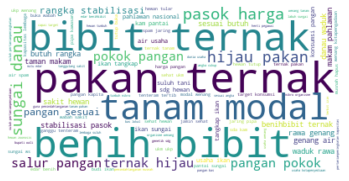

Cluster: 9


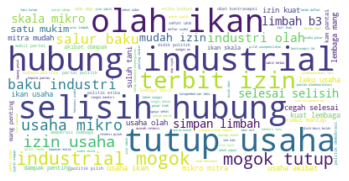

Cluster: 10


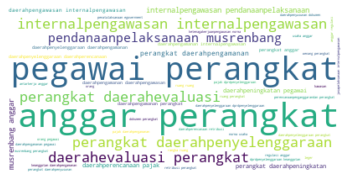

Cluster: 11


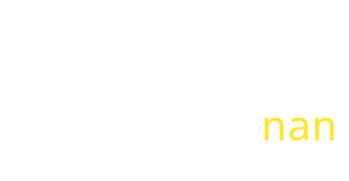

Cluster: 12


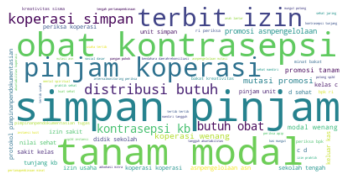

Cluster: 13


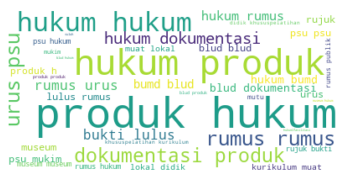

Cluster: 14


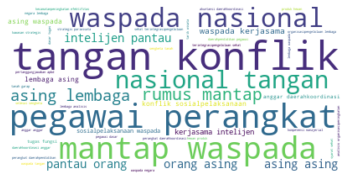

Cluster: 15


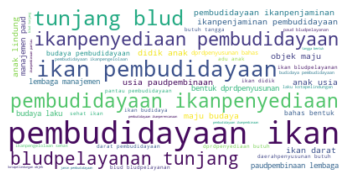

Cluster: 16


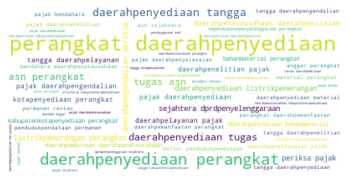

Cluster: 17


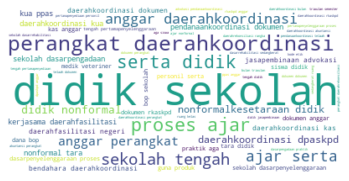

Cluster: 18


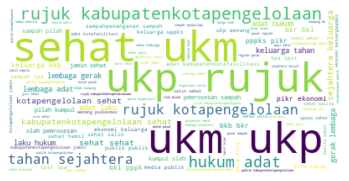

Cluster: 19


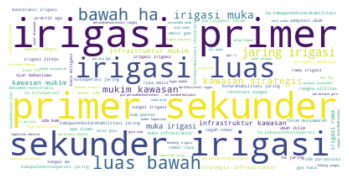

Cluster: 20


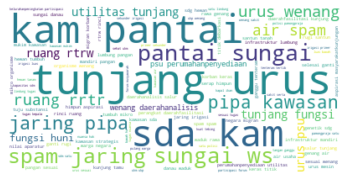

Cluster: 21


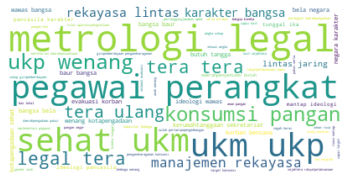

Cluster: 22


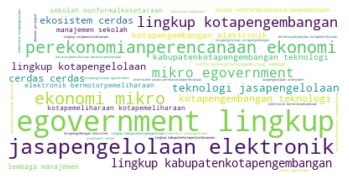

Cluster: 23


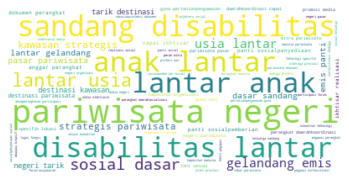

Cluster: 24


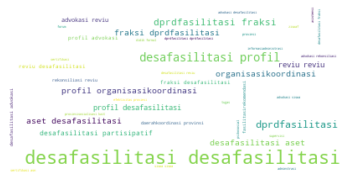

Cluster: 25


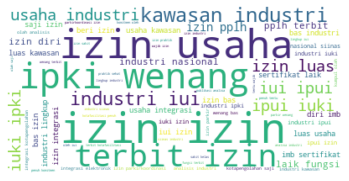

Cluster: 26


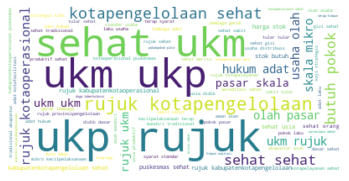

Cluster: 27


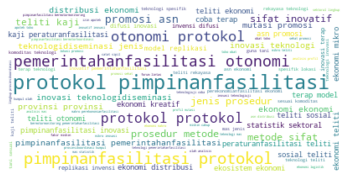

Cluster: 28


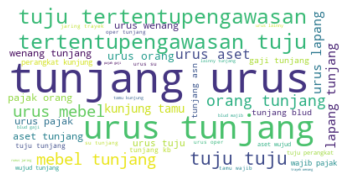

Cluster: 29


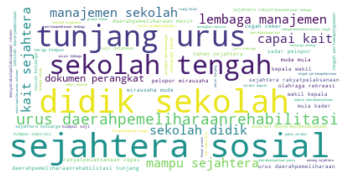

Cluster: 30


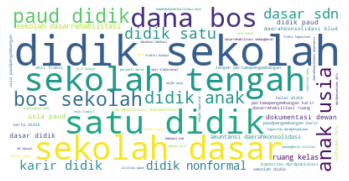

Cluster: 31


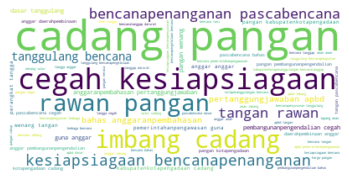

Cluster: 32


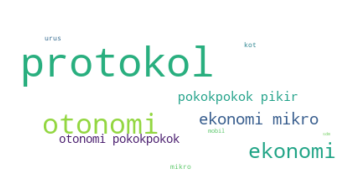

Cluster: 33


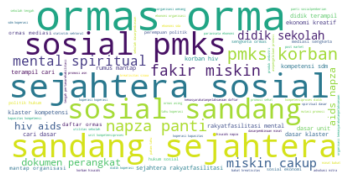

Cluster: 34


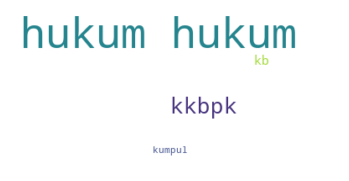

Cluster: 35


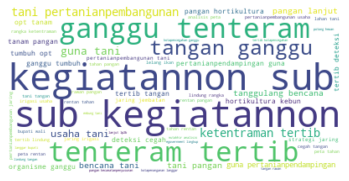

Cluster: 36


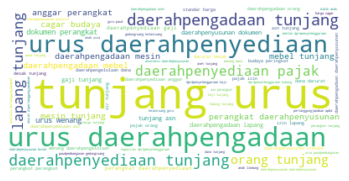

Cluster: 37


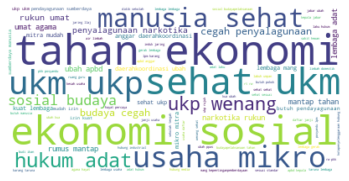

Cluster: 38


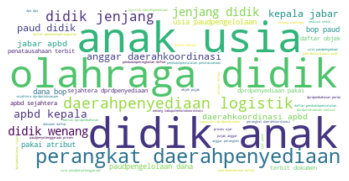

Cluster: 39


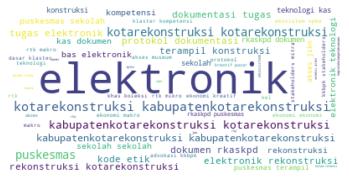

Cluster: 40


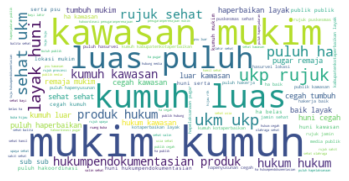

Cluster: 41


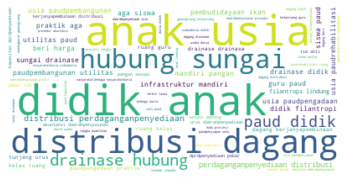

Cluster: 42


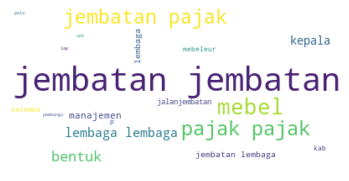

Cluster: 43


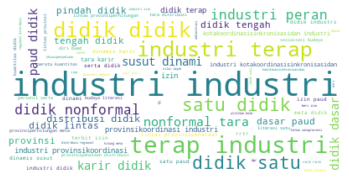

Cluster: 44


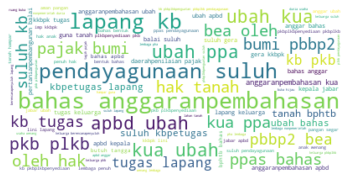

Cluster: 45


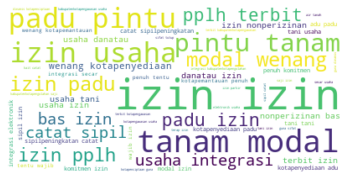

Cluster: 46


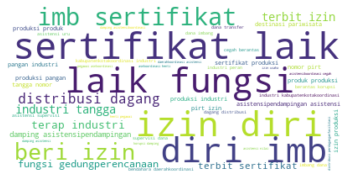

Cluster: 47


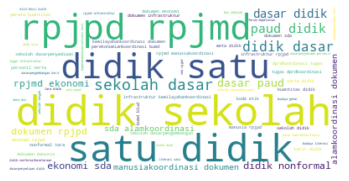

Cluster: 48


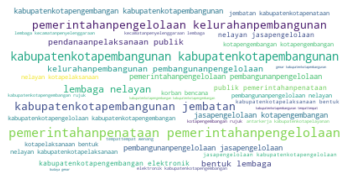

Cluster: 49


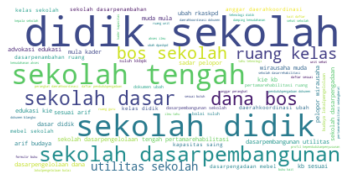

In [22]:
from wordcloud import WordCloud

result= results

for k in range(0,true_k):
   s=result[result.Cluster==k]
   text=s['Nama Kegiatan_stem'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   titles=results[results.Cluster==k]['Nama Kegiatan_stem']         
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

In [23]:
results.groupby(by='Cluster').sum()

Kode Pemda     Tahun  Nilai Anggaran
Cluster                                      
0         222062.65  30798019    2.691600e+13
1         124567.92  17712044    4.279652e+14
2         120008.73  16507528    1.252139e+13
3         232575.79  31863086    2.240417e+13
4           7742.78   1046878    4.765378e+11
5          78593.82  10739594    1.371440e+13
6         180781.03  24500583    2.219401e+13
7         123045.70  16681334    2.689956e+13
8         246787.46  33774952    2.092588e+13
9         125036.53  16725796    1.150384e+13
10         91747.75  12311932    4.237814e+13
11         14668.92   1742102    8.263628e+13
12        213800.57  29163030    9.566035e+12
13         19740.49   2687930    3.288652e+12
14        189285.77  25856674    3.564850e+13
15         75471.89  10695132    3.119659e+13
16        122214.01  16539864    1.708912e+13
17        141605.91  19268214    2.554718e+13
18        170502.43  23595175    2.346962e+13
19         76841.39  11135710    1.439007e+13
20        148219.93  20486877    1.059710e+14
21        270948.67  36980258    2.053034e+13
22         67854.78   9529015    1.114918e+13
23        177640.56  24435911    1.104726e+13
24         43393.75   5931635    3.307633e+12
25         39979.52   5495099    2.946299e+12
26        131214.49  17924249    2.467806e+13
27         48812.04   6564208    1.114182e+13
28         44607.77   5767934    8.137349e+13
29        198475.53  27230954    1.538856e+13
30         99720.56  14086370    1.588131e+13
31         50478.34   7148277    3.609707e+12
32          7388.58   1004437    6.850499e+11
33        216062.90  29680406    1.607404e+13
34          8684.76   1194411    4.088968e+11
35        178460.84  24672368    5.776011e+14
36        194353.85  25533314    2.909410e+14
37        175267.78  23528482    1.827172e+13
38        100032.78  13661960    5.185800e+13
39         24257.51   3364965    1.541594e+13
40         70543.42   9543162    7.999058e+13
41         86624.16  11867312    6.898022e+12
42         14376.50   2059399    2.804553e+12
43         19790.91   2675804    1.925932e+12
44         60071.42   8417465    4.299391e+12
45         63115.16   8653922    2.955114e+12
46        122529.66  17334117    3.358186e+13
47        121796.74  16913749    2.951798e+13
48         81968.04  11176130    1.839186e+13
49        141633.43  18965064    2.404361e+13

In [24]:
results['Label'] = results['Cluster']

In [25]:
results

Akun Analisis        Nama Kegiatan  \
0                                  41. PAD           pendapatan   
1                                  41. PAD           pendapatan   
2                                  41. PAD           pendapatan   
3                                  41. PAD           pendapatan   
4                                  41. PAD  non kegiatannon sub   
...                                    ...                  ...   
378606  66. Pengeluaran Pembiayaan Lainnya  non kegiatannon sub   
378607  66. Pengeluaran Pembiayaan Lainnya  non kegiatannon sub   
378608  66. Pengeluaran Pembiayaan Lainnya                  NaN   
378609  66. Pengeluaran Pembiayaan Lainnya                  NaN   
378610  66. Pengeluaran Pembiayaan Lainnya  non kegiatannon sub   

       Nama Kegiatan_stem  Kode Pemda           Standar Pemda  Tahun  \
0                  kosong        1.00           Provinsi Aceh   2021   
1                  kosong        1.00           Provinsi Aceh   2021   
2                  kosong        1.00           Provinsi Aceh   2021   
3                  kosong        1.00           Provinsi Aceh   2021   
4         kegiatannon sub        1.01         Kab. Aceh Barat   2021   
...                   ...         ...                     ...    ...   
378606    kegiatannon sub       22.05           Kab. Jembrana   2021   
378607    kegiatannon sub       24.09              Kab. Sikka   2021   
378608                nan       24.22             Kab. Malaka   2021   
378609                nan       31.02  Kab. Kepulauan Anambas   2021   
378610    kegiatannon sub       33.04             Kab. Mamasa   2021   

        Nilai Anggaran  Cluster  Label  
0         1.374556e+12        1      1  
1         1.213355e+10        1      1  
2         1.823856e+11        1      1  
3         8.326078e+11        1      1  
4         2.393480e+10       35     35  
...                ...      ...    ...  
378606    5.400000e+09       35     35  
378607    5.000000e+08       35     35  
378608    4.000000e+09       11     11  
378609    1.000000e+09       11     11  
378610    2.060760e+10       35     35  

[378611 rows x 9 columns]

In [40]:
results['Label'] = results['Label'].replace([0], 'Kesehatan')    
results['Label'] = results['Label'].replace([1], 'Lainnya')
results['Label'] = results['Label'].replace([2], 'UMKM')
results['Label'] = results['Label'].replace([3], 'UMKM')
results['Label'] = results['Label'].replace([4], 'Lainnya')
results['Label'] = results['Label'].replace([5], 'Pariwisata')
results['Label'] = results['Label'].replace([6], 'Lainnya')
results['Label'] = results['Label'].replace([7], 'Lainnya')
results['Label'] = results['Label'].replace([8], 'Pertanian')
results['Label'] = results['Label'].replace([9], 'UMKM')
results['Label'] = results['Label'].replace([10], 'Lainnya')
results['Label'] = results['Label'].replace([11], 'Lainnya')
results['Label'] = results['Label'].replace([12], 'UMKM')
results['Label'] = results['Label'].replace([13], 'Lainnya')
results['Label'] = results['Label'].replace([14], 'Lainnya')
results['Label'] = results['Label'].replace([15], 'Pertanian')
results['Label'] = results['Label'].replace([16], 'Lainnya')
results['Label'] = results['Label'].replace([17], 'Pendidikan')
results['Label'] = results['Label'].replace([18], 'Kesehatan')
results['Label'] = results['Label'].replace([19], 'Pertanian')
results['Label'] = results['Label'].replace([20], 'Lainnya')
results['Label'] = results['Label'].replace([21], 'Lainnya')
results['Label'] = results['Label'].replace([22], 'Lainnya')
results['Label'] = results['Label'].replace([23], 'Pariwisata')
results['Label'] = results['Label'].replace([24], 'Lainnya')
results['Label'] = results['Label'].replace([25], 'UMKM')
results['Label'] = results['Label'].replace([26], 'Kesehatan')
results['Label'] = results['Label'].replace([27], 'Lainnya')
results['Label'] = results['Label'].replace([28], 'Lainnya')
results['Label'] = results['Label'].replace([29], 'Pendidikan')
results['Label'] = results['Label'].replace([30], 'Pendidikan')
results['Label'] = results['Label'].replace([31], 'Pertanian')
results['Label'] = results['Label'].replace([32], 'UMKM')
results['Label'] = results['Label'].replace([33], 'Lainnya')
results['Label'] = results['Label'].replace([34], 'Lainnya')
results['Label'] = results['Label'].replace([35], 'Lainnya')
results['Label'] = results['Label'].replace([36], 'Lainnya')
results['Label'] = results['Label'].replace([37], 'UMKM')
results['Label'] = results['Label'].replace([38], 'Pendidikan')
results['Label'] = results['Label'].replace([39], 'Lainnya')
results['Label'] = results['Label'].replace([40], 'Lainnya')
results['Label'] = results['Label'].replace([41], 'Pendidikan')
results['Label'] = results['Label'].replace([42], 'Lainnya')
results['Label'] = results['Label'].replace([43], 'UMKM')
results['Label'] = results['Label'].replace([44], 'Lainnya')
results['Label'] = results['Label'].replace([45], 'UMKM')
results['Label'] = results['Label'].replace([46], 'Lainnya')
results['Label'] = results['Label'].replace([47], 'Pendidikan')
results['Label'] = results['Label'].replace([48], 'Lainnya')
results['Label'] = results['Label'].replace([49], 'Pendidikan')

In [41]:
results.groupby(by='Label').sum()

Kode Pemda      Tahun  Nilai Anggaran  Cluster
Label                                                     
Kesehatan    523779.57   72317443    7.506368e+13   440744
Lainnya     2468940.21  337315005    1.931559e+15  3994571
Pariwisata   256234.38   35175505    2.476166e+13   304663
Pendidikan   889889.11  121993623    1.691347e+14  2112715
Pertanian    449579.08   62754071    7.012225e+13   427413
UMKM         996963.57  135617184    8.277955e+13  1075533

In [42]:
results.to_excel('Data_APBD_2021.xlsx')

In [43]:
results

Akun Analisis        Nama Kegiatan  \
0                                  41. PAD           pendapatan   
1                                  41. PAD           pendapatan   
2                                  41. PAD           pendapatan   
3                                  41. PAD           pendapatan   
4                                  41. PAD  non kegiatannon sub   
...                                    ...                  ...   
378606  66. Pengeluaran Pembiayaan Lainnya  non kegiatannon sub   
378607  66. Pengeluaran Pembiayaan Lainnya  non kegiatannon sub   
378608  66. Pengeluaran Pembiayaan Lainnya                  NaN   
378609  66. Pengeluaran Pembiayaan Lainnya                  NaN   
378610  66. Pengeluaran Pembiayaan Lainnya  non kegiatannon sub   

       Nama Kegiatan_stem  Kode Pemda           Standar Pemda  Tahun  \
0                  kosong        1.00           Provinsi Aceh   2021   
1                  kosong        1.00           Provinsi Aceh   2021   
2                  kosong        1.00           Provinsi Aceh   2021   
3                  kosong        1.00           Provinsi Aceh   2021   
4         kegiatannon sub        1.01         Kab. Aceh Barat   2021   
...                   ...         ...                     ...    ...   
378606    kegiatannon sub       22.05           Kab. Jembrana   2021   
378607    kegiatannon sub       24.09              Kab. Sikka   2021   
378608                nan       24.22             Kab. Malaka   2021   
378609                nan       31.02  Kab. Kepulauan Anambas   2021   
378610    kegiatannon sub       33.04             Kab. Mamasa   2021   

        Nilai Anggaran  Cluster    Label  
0         1.374556e+12        1  Lainnya  
1         1.213355e+10        1  Lainnya  
2         1.823856e+11        1  Lainnya  
3         8.326078e+11        1  Lainnya  
4         2.393480e+10       35  Lainnya  
...                ...      ...      ...  
378606    5.400000e+09       35  Lainnya  
378607    5.000000e+08       35  Lainnya  
378608    4.000000e+09       11  Lainnya  
378609    1.000000e+09       11  Lainnya  
378610    2.060760e+10       35  Lainnya  

[378611 rows x 9 columns]